In [5]:
pip install japanize-matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import japanize_matplotlib
import matplotlib.pyplot as plt

In [151]:
# from google.colab import drive
# drive.mount('/content/drive')
data = pd.read_csv("data4000.csv")

In [8]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [9]:
data.head()

,receipt_num,receipt_buydate,receipt_buytime,G_gyoutai_name,receipt_value,cat1,cat2,cat3,cat4,product_name,unit,price,volume,tanka,id,gender,age,married,job
0,57054875.0,2014-08-23,06:10,コンビニエンスストア,616.0,食料品,たばこ,たばこ,たばこ,KOOL MILDS B,1.0,450.0,20000.0,450.0,12034.0,女性,20代,未婚,その他の職業
1,56127093.0,2014-08-01,10:32,コンビニエンスストア,673.0,食料品,たばこ,たばこ,たばこ,KENT 6 B,1.0,420.0,20000.0,420.0,41.0,男性,40代,既婚,自営業・個人事業主
2,56133844.0,2014-08-01,15:05,薬局・ドラッグストア,725.0,食料品,たばこ,たばこ,たばこ,KENT 6 B,1.0,420.0,20000.0,420.0,41.0,男性,40代,既婚,自営業・個人事業主
3,56180360.0,2014-08-02,17:10,薬局・ドラッグストア,1302.0,食料品,たばこ,たばこ,たばこ,KENT 6 B,1.0,420.0,20000.0,420.0,41.0,男性,40代,既婚,自営業・個人事業主
4,56210002.0,2014-08-03,15:44,薬局・ドラッグストア,651.0,食料品,たばこ,たばこ,たばこ,KENT 6 B,1.0,420.0,20000.0,420.0,41.0,男性,40代,既婚,自営業・個人事業主


In [10]:
data.shape

(4159759, 19)

# カテゴリごとのデータ件数

## cat1におけるデータ件数

In [14]:
cat1_count = data.groupby('cat1').size()
cat1_count

cat1
ヘルスケア      32011
化粧品        47730
日用品雑貨     339360
食料品      3740595
dtype: int64

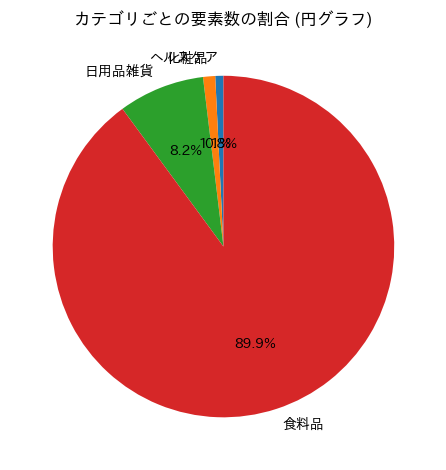

In [15]:
plt.pie(cat1_count, labels=cat1_count.index, autopct='%1.1f%%', startangle=90)
plt.title("カテゴリごとの要素数の割合 (円グラフ)")
plt.tight_layout()
plt.show()


## cat1=食料品のデータカテゴリ

In [17]:
cat1_in_groce = data[data['cat1']=='食料品'].groupby('cat2').size()
cat1_in_groce

cat2
たばこ       57135
主食       604676
加工食品     359619
嗜好品      668943
日配品     1258970
調味料      182924
飲料       608328
dtype: int64

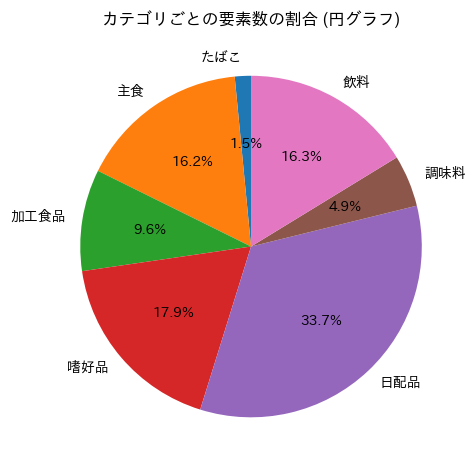

In [18]:
plt.pie(cat1_in_groce, labels=cat1_in_groce.index, autopct='%1.1f%%', startangle=90)
plt.title("カテゴリごとの要素数の割合 (円グラフ)")
plt.tight_layout()
plt.show()


In [159]:
cat4_in_groce = data[data['cat1']=='食料品'].groupby('cat4').size().reset_index(name="count")
cat4_in_groce_sort = cat4_in_groce.sort_values(by = 'count', ascending = False)

In [161]:
cat4_in_groce_sort.to_csv('cat4_data.csv',encoding="utf-8")

In [20]:
 data[data['cat4']=='豆腐類']['product_name'].unique()

array(['          TVｸﾞﾘ-ﾝｱｲﾕｳｷﾐﾆﾄｳﾌ  150GX3',
       '          ﾄﾂﾌﾟVﾍﾞｽﾄﾌﾟﾗｲｽｱﾌﾞﾗｱｹﾞ 5ﾏｲ',
       '          ｲｵﾝ ﾄﾂﾌﾟVﾃｱｹﾞﾌｳｱﾌﾞﾗｱｹﾞ2ﾏｲ', ...,
       '          ｻﾝﾌ-ﾄ ﾄｳﾌ(ﾓﾒﾝ)        ﾌﾒｲ',
       '          ｱｻﾋｺ ﾕｳｷｼﾞﾕｳﾃﾝﾐﾆｷﾇﾄｳﾌ150G',
       '          ｺｸｻﾝｵｵﾔﾏｱﾌﾞﾘｼﾞﾕｳﾃﾝｷﾇ200X2'], dtype=object)

## cat1が食料品のデータの作成

In [22]:
#cat1が食品のデータ
cat1_groce_data = data[data['cat1']=='食料品']


### 日配品のデータ確認

In [24]:
#食料品のうち日配品のcat3カテゴリ
cat2_nippai_data = cat1_groce_data[cat1_groce_data['cat2']=='日配品']
cat2_nippai_cat = cat1_groce_data[cat1_groce_data['cat2']=='日配品'].groupby('cat3').size()
cat2_nippai_cat

cat3
その他日配品        25981
チルド飲料        138823
ハム・ソーセージ類    100981
冷凍食品         192980
和日配          377253
洋日配          422952
dtype: int64

### 日配品のカテゴリの確認

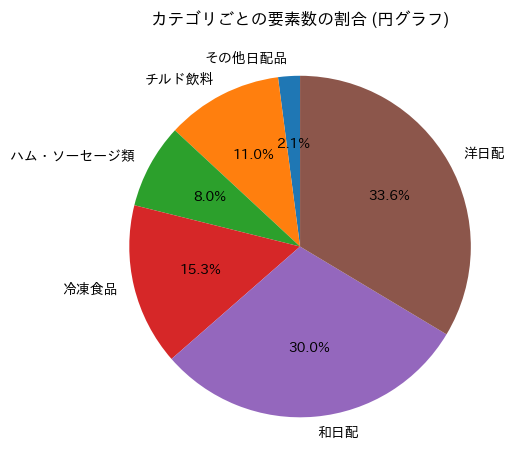

In [26]:
plt.pie(cat2_nippai_cat, labels=cat2_nippai_cat.index, autopct='%1.1f%%', startangle=90)
plt.title("カテゴリごとの要素数の割合 (円グラフ)")
plt.tight_layout()
plt.show()

### 日配品の深掘り

In [143]:
#日配品では、cat4にどのようなカテゴリがあるか
cat2_nippai_data.groupby('cat4').size().reset_index()

,cat4,0
0,ﾎｲｯﾌﾟｸﾘ-ﾑ,4651
1,かまぼこ,22919
2,その他冷凍食品,5114
3,その他練り製品,5871
4,その他調理食品,5039
5,その他食品,19
6,その他麺類,637
7,ちくわ,24492
8,はんぺん,4642
9,もずく・めかぶ,9707


## cat1 != 食料品 のcat2カテゴリ

In [30]:
cat2_not_groce_cat = data[data['cat1']!='食料品'].groupby('cat2').size()
cat2_not_groce_cat

cat2
その他化粧品          414
その他日用品         2806
ハウスホールド      143945
パーソナルケア       92336
ペット用品         33229
ボディ・エチケット     18786
メイクアップ        10192
健康食品           7813
医薬品           24198
基礎化粧品         18338
衛生用品          67044
dtype: int64

### 食料品以外のカテゴリの可視化

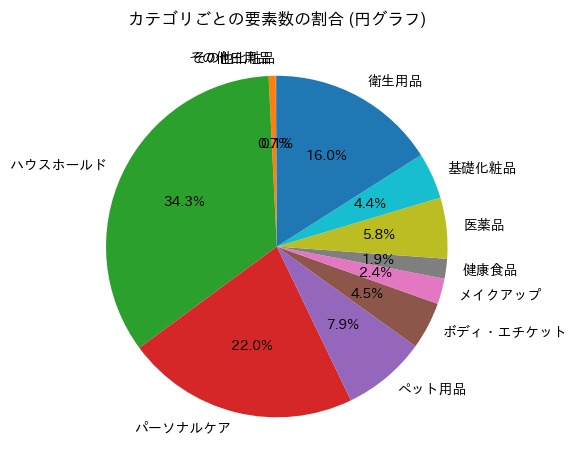

In [32]:
plt.pie(cat2_not_groce_cat, labels=cat2_not_groce_cat.index, autopct='%1.1f%%', startangle=90)
plt.title("カテゴリごとの要素数の割合 (円グラフ)")
plt.tight_layout()
plt.show()

## 業態数

In [34]:
#data[data['cat4']=='豆腐類']['product_name'].unique()
gyoutai = data.groupby('G_gyoutai_name').size().reset_index()
gyoutai.columns = ['G_gyoutai_name', 'count']
gyoutai.sort_values(by='count', ascending=False)

,G_gyoutai_name,count
4,スーパー,2557398
22,薬局・ドラッグストア,501907
2,コンビニエンスストア,384465
7,ホームセンター/ディスカウントストア,177954
13,宅配・通販（インターネット注文） ※牛乳店・ヤクルトレディの注文含む,166432
14,宅配・通販（カタログ・電話他注文） ※牛乳店・ヤクルトレディの注文含む,77294
20,自販機（職場内・学校内）,54359
0,100円・99円ｼｮｯﾌﾟ,53706
21,自販機（街頭・路上）,43175
19,自販機（施設内）※併設駐車場含む,28598


### 業態がスーパーのデータ作成

In [36]:
data[data['G_gyoutai_name']=='スーパー'].groupby('product_name').size().reset_index()

,product_name,0
0,ﾐﾐﾏﾃﾞﾔﾜﾗｶｵｲｼｲｼﾖｸﾊﾟﾝ 6ﾏｲ,10
1,&FA AM ﾃﾞﾕｱﾙﾊﾟﾌ,1
2,&FA AM ﾋﾟﾕ-ﾘFｸﾛｽEX 60ﾏｲ,1
3,&FA AMｸﾘｱﾘﾝｸﾞｳｵ-ﾀ- 150ML,1
4,&FA AMﾃﾞﾕｱﾙﾊﾟｳﾀﾞ-<R>ﾗｲﾄBE,1
...,...,...
120631,ﾜﾝﾜﾝｼ ｻﾗﾀﾞｺﾏﾙｾﾝ 50ﾏｲ,1
120632,ﾜﾝﾜﾝｼ ﾕｷﾓﾁ ｻﾗﾀﾞｱｼﾞ 24ﾏｲ,41
120633,ﾜﾝﾜﾝｼ ﾕｷﾓﾁﾏﾂﾁﾔﾐﾙｸｱｼﾞ 22ﾏｲ,24
120634,ﾜﾝﾜﾝｼﾔ-ﾍﾞﾂﾄﾌﾙ-ﾂﾐﾂｸｽ8P160G,1


## ユーザーの購買回数の可視化

In [38]:
user_buy_count = data.groupby('id').size()

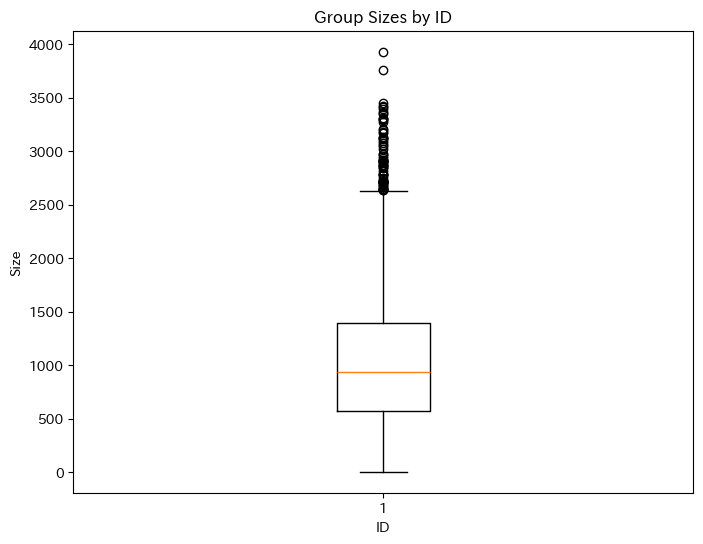

In [44]:
import matplotlib.pyplot as plt

# グループ化と集計
group_sizes = data.groupby('id').size()

# 箱ひげ図の作成
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(group_sizes)
ax.set_title('Group Sizes by ID')
ax.set_xlabel('ID')
ax.set_ylabel('Size')

plt.show()


Text(0, 0.5, 'user_count')

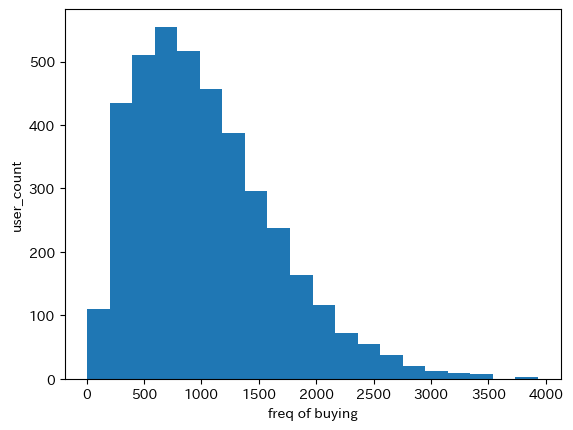

In [46]:
plt.hist(user_buy_count, bins = 20)
plt.xlabel('freq of buying')
plt.ylabel('user_count')

### ユーザーの外れ値の確認

In [48]:
#購買回数が２５００回を超えているユーザーの確認
#ユーザーのレコード数を取得する
data.groupby('id').size()[data.groupby('id').size()>2500].reset_index()

,id,0
0,27.0,2576
1,401.0,3115
2,1121.0,2555
3,1168.0,3363
4,1579.0,2612
...,...,...
92,36671.0,2906
93,37165.0,2850
94,37296.0,2712
95,37782.0,3133


### 平均的な購買ユーザー 購買期間も

1000回以上2500回以上の購買ユーザー

In [50]:
#平均的な購買回数のユーザー
under2500count_user = user_buy_count[user_buy_count<2500 ]

In [52]:
target_user = under2500count_user[1000< under2500count_user]

In [54]:
user_purchase_range = data.groupby('id')['receipt_buydate'].agg(['min', 'max'])

In [55]:
user_purchase_range

,min,max
id,,
1.0,2014-04-02,2015-03-30
16.0,2014-04-02,2015-03-31
23.0,2014-04-03,2015-03-31
27.0,2014-04-01,2015-03-31
40.0,2014-04-02,2015-03-31
...,...,...
40310.0,2014-04-01,2015-03-31
40335.0,2014-04-01,2015-03-25
40341.0,2014-04-01,2015-03-30


In [56]:
user_purchase_range['min'] = pd.to_datetime(user_purchase_range['min'])
user_purchase_range['max'] = pd.to_datetime(user_purchase_range['max'])

In [60]:
purchase_duration = user_purchase_range['max'] - user_purchase_range['min']
purchase_duration.describe()

count                         4000
mean      360 days 15:47:31.200000
std      6 days 02:57:51.515379212
min              192 days 00:00:00
25%              360 days 00:00:00
50%              362 days 00:00:00
75%              364 days 00:00:00
max              364 days 00:00:00
dtype: object

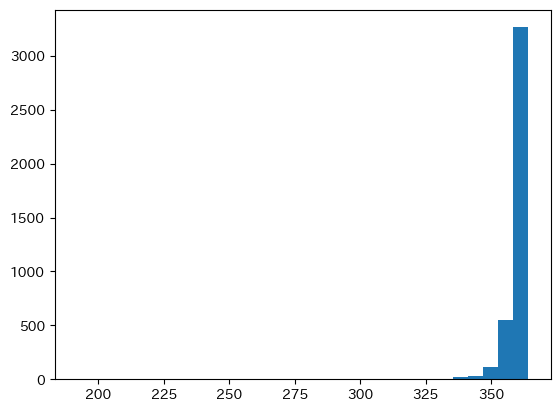

In [62]:
plt.hist(purchase_duration.dt.days, bins=30)
plt.show()

## 対象ユーザーのデータ作成

In [65]:
target_id = target_user.reset_index()['id']
target_data = data[data['id'].isin(target_id)]

In [67]:
#日付データの形式変更
target_data['receipt_buytime'] = pd.to_datetime(target_data['receipt_buytime'])
target_data['receipt_buydate'] = pd.to_datetime(target_data['receipt_buydate'])

C:\Users\nama\AppData\Local\Temp\ipykernel_15636\184921586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data['receipt_buytime'] = pd.to_datetime(target_data['receipt_buytime'])
C:\Users\nama\AppData\Local\Temp\ipykernel_15636\184921586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data['receipt_buydate'] = pd.to_datetime(target_data['receipt_buydate'])


In [68]:
#年月単位で時間を取得
target_data['receipt_buydate'].dt.to_period("M").unique()

<PeriodArray>
['2014-08', '2014-09', '2014-05', '2014-04', '2014-06', '2014-07', '2014-10',
 '2014-11', '2014-12', '2015-01', '2015-02', '2015-03']
Length: 12, dtype: period[M]

## 対象データの作成

#### cat1のカテゴリを絞っていないデータ

In [71]:
target_data

,receipt_num,receipt_buydate,receipt_buytime,G_gyoutai_name,receipt_value,cat1,cat2,cat3,cat4,product_name,unit,price,volume,tanka,id,gender,age,married,job
22,56455681.0,2014-08-09,2024-06-25 20:52:00,百貨店・デパート,32000.0,化粧品,基礎化粧品,基礎用,栄養クリ－ム,EL ﾘﾆﾕ-ﾄﾘｲﾌﾞACｸﾘ-ﾑ 48G,1.0,32000.0,48000.0,32000.0,13681.0,女性,60代,既婚,正社員・公務員
24,56382031.0,2014-08-07,2024-06-25 13:54:00,コンビニエンスストア,5055.0,食料品,たばこ,たばこ,たばこ,KENT NANOTEK 1 B10,1.0,4100.0,200000.0,4100.0,6812.0,男性,60代,既婚,派遣社員
25,56857789.0,2014-08-17,2024-06-25 18:03:00,コンビニエンスストア,5020.0,食料品,たばこ,たばこ,たばこ,KENT NANOTEK 1 B10,1.0,4100.0,200000.0,4100.0,6812.0,男性,60代,既婚,派遣社員
26,57266047.0,2014-08-29,2024-06-25 16:04:00,コンビニエンスストア,4357.0,食料品,たばこ,たばこ,たばこ,KENT NANOTEK 1 B10,1.0,4100.0,200000.0,4100.0,6812.0,男性,60代,既婚,派遣社員
29,56737972.0,2014-08-15,2024-06-25 21:15:00,スーパー,1421.0,食料品,日配品,洋日配,チ－ズ,ｸﾗﾌﾄ 100%ﾊﾟﾙﾒｻﾞﾝﾁ-ｽﾞ 80G,1.0,277.0,80000.0,277.0,2660.0,女性,30代,既婚,パート・アルバイト
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159748,57331288.0,2014-08-29,2024-06-25 15:22:00,スーパー,6954.0,NaN,NaN,NaN,NaN,NaN,2.0,172.0,3000.0,86.0,40233.0,女性,40代,既婚,その他の職業
4159749,56585315.0,2014-08-12,2024-06-25 17:55:00,スーパー,976.0,NaN,NaN,NaN,NaN,NaN,1.0,98.0,3000.0,98.0,19556.0,女性,40代,既婚,その他の職業
4159751,56749338.0,2014-08-14,2024-06-25 15:44:00,スーパー,2946.0,NaN,NaN,NaN,NaN,NaN,1.0,92.0,3000.0,92.0,15774.0,女性,50代,既婚,派遣社員
4159752,56746759.0,2014-08-16,2024-06-25 20:29:00,スーパー,3160.0,NaN,NaN,NaN,NaN,NaN,5.0,365.0,2000000.0,73.0,12990.0,女性,40代,既婚,派遣社員


#### 食品カテゴリにしたもの

In [204]:
target_data_food = target_data[target_data['cat1']=='食料品']

In [74]:
target_data_food.shape

(2336563, 19)

In [75]:
target_data_food.head()

,receipt_num,receipt_buydate,receipt_buytime,G_gyoutai_name,receipt_value,cat1,cat2,cat3,cat4,product_name,unit,price,volume,tanka,id,gender,age,married,job
24,56382031.0,2014-08-07,2024-06-25 13:54:00,コンビニエンスストア,5055.0,食料品,たばこ,たばこ,たばこ,KENT NANOTEK 1 B10,1.0,4100.0,200000.0,4100.0,6812.0,男性,60代,既婚,派遣社員
25,56857789.0,2014-08-17,2024-06-25 18:03:00,コンビニエンスストア,5020.0,食料品,たばこ,たばこ,たばこ,KENT NANOTEK 1 B10,1.0,4100.0,200000.0,4100.0,6812.0,男性,60代,既婚,派遣社員
26,57266047.0,2014-08-29,2024-06-25 16:04:00,コンビニエンスストア,4357.0,食料品,たばこ,たばこ,たばこ,KENT NANOTEK 1 B10,1.0,4100.0,200000.0,4100.0,6812.0,男性,60代,既婚,派遣社員
29,56737972.0,2014-08-15,2024-06-25 21:15:00,スーパー,1421.0,食料品,日配品,洋日配,チ－ズ,ｸﾗﾌﾄ 100%ﾊﾟﾙﾒｻﾞﾝﾁ-ｽﾞ 80G,1.0,277.0,80000.0,277.0,2660.0,女性,30代,既婚,パート・アルバイト
34,56406632.0,2014-08-07,2024-06-25 09:23:00,コンビニエンスストア,1316.0,食料品,たばこ,たばこ,たばこ,KOOL MILDS B,2.0,900.0,20000.0,450.0,9015.0,女性,30代,既婚,パート・アルバイト


### 年月別ユーザーの購買データ作成

#### 年月別ユーザー数でtime_sliceを作成する

In [78]:
# 年月日別でのユーザー数でtime_sliceを作成
u_cont_day = target_data_food.groupby(target_data_food['receipt_buydate'].dt.to_period("S"))["id"].nunique().reset_index()
u_cont_day.columns = ['receipt_buydate', 'unique_user_count']
u_cont_day.head()

user_time_slice_day = u_cont_day['unique_user_count'].tolist()
user_time_slice_day

[924,
 944,
 934,
 980,
 1016,
 1027,
 975,
 1137,
 1023,
 1044,
 1056,
 1038,
 1057,
 998,
 1139,
 1033,
 1080,
 1019,
 1054,
 1081,
 1001,
 1078,
 1024,
 1029,
 1097,
 1031,
 1066,
 957,
 999,
 901,
 1104,
 1056,
 945,
 969,
 942,
 1131,
 1047,
 1096,
 1029,
 1100,
 1089,
 1000,
 1109,
 1060,
 1102,
 1060,
 1049,
 1064,
 989,
 1160,
 1000,
 1076,
 1092,
 1044,
 1102,
 1016,
 1109,
 1022,
 1021,
 1055,
 935,
 1081,
 1057,
 1152,
 1103,
 997,
 1024,
 1004,
 1092,
 990,
 1149,
 1003,
 1013,
 1067,
 1056,
 1111,
 1031,
 1139,
 1039,
 1052,
 1117,
 1061,
 1050,
 1029,
 1094,
 1073,
 1042,
 1047,
 1054,
 1028,
 995,
 1140,
 1053,
 1037,
 1031,
 1099,
 1076,
 1002,
 1153,
 1026,
 1013,
 1033,
 1057,
 1084,
 1016,
 1142,
 1029,
 1052,
 1048,
 985,
 1026,
 1003,
 1107,
 1041,
 1017,
 1079,
 995,
 1028,
 944,
 1029,
 997,
 893,
 1059,
 954,
 1071,
 1014,
 1093,
 1026,
 1027,
 1063,
 1013,
 947,
 1039,
 1066,
 969,
 905,
 952,
 950,
 1074,
 1026,
 1075,
 1116,
 1065,
 1019,
 988,
 1022,
 1058,


In [79]:
target_data_food.groupby('G_gyoutai_name').size().reset_index()

,G_gyoutai_name,0
0,100円・99円ｼｮｯﾌﾟ,24146
1,その他,12788
2,コンビニエンスストア,188545
3,コーヒー専門店,2990
4,スーパー,1593566
5,パン・菓子店,6225
6,ペット用品店,4
7,ホームセンター/ディスカウントストア,79034
8,一般酒店,1309
9,一般食料品店,9220


In [80]:
# 年月別でのユーザー数でtime_sliceを作成
unique_user_count = target_data_food.groupby(target_data_food['receipt_buydate'].dt.to_period("M"))['id'].nunique().reset_index()
unique_user_count.columns = ['receipt_buydate', 'unique_user_count']
unique_user_count.head()

,receipt_buydate,unique_user_count
0,2014-04,1741
1,2014-05,1742
2,2014-06,1742
3,2014-07,1742
4,2014-08,1742


In [81]:
user_time_slice = unique_user_count['unique_user_count'].tolist()
user_time_slice

[1741, 1742, 1742, 1742, 1742, 1742, 1742, 1742, 1742, 1742, 1742, 1742]

#### ユーザーの年月別の購買商品を取得しリスト化 年月日別cat4も作成

In [83]:
# 年月別とidでグループ化し、product_nameをリストにする
grouped_garm_data = target_data_food.groupby([target_data_food['receipt_buydate'].dt.to_period("M"), 'id'])['product_name'].apply(lambda x: [product.strip() for product in x]).reset_index()
# 年月日別とidでグループ化し、cat4をリストにする
grouped_cat4_data = target_data_food.groupby([target_data_food['receipt_buydate'].dt.to_period("S"), 'id'])['cat4'].apply(lambda x: [product.strip() for product in x]).reset_index()


In [84]:
# 'フメイ'を含むproduct_nameを抽出
filtered_data = target_data_food[target_data_food['product_name'].str.contains('ﾌﾒｲ')]

# 各product_nameの出現回数をカウント
product_count = filtered_data.groupby('product_name').size().reset_index(name='count')

# 結果の表示
product_count


,product_name,count
0,7-11ｼ ｶｼﾊﾟﾝ･ﾁﾖｳﾘﾊﾟﾝ ﾌﾒｲ,1
1,7-11ｼ ｻﾂﾏｱｹﾞ ﾌﾒｲ,4
2,AGF ｿﾉﾀｴｷﾀｲｲｶﾞｲ ｵﾁﾔ ﾌﾒｲ,1
3,AGF RC (ｶﾝｲﾘ) ﾌﾒｲ,1
4,AGF RC (ﾌｸﾛﾊﾟﾂｸ ｺﾅ) ﾌﾒｲ,1
...,...,...
3758,ﾜﾀﾞｶﾝ ﾒﾝﾂﾕ･ﾂﾕﾉﾓﾄ ﾌﾒｲ,3
3759,ﾜﾀﾞﾊﾁ ｶﾏﾎﾞｺ ﾌﾒｲ,1
3760,ﾜﾀﾞﾊﾁ ｻﾂﾏｱｹﾞ ﾌﾒｲ,1
3761,ﾜﾝﾀﾞ- ｷﾔﾝﾃﾞｲ ﾌﾒｲ,2


In [85]:
filtered_data.shape

(161937, 19)

In [86]:
target_data_food.groupby("product_name").size().reset_index()

,product_name,0
0,ﾐﾐﾏﾃﾞﾔﾜﾗｶｵｲｼｲｼﾖｸﾊﾟﾝ 6ﾏｲ,1
1,0KCALｶﾝﾃﾝｾﾞﾘ-ｸﾞﾚ-ﾌﾟF 250G,21
2,0KCALｾﾞﾘ-ﾌﾙ-ﾂｱｿ-ﾄ 14GX42,3
3,0ｶﾛﾘ- ｿ-ﾀﾞｶﾁﾜﾘｺｵﾘ H 100ML,2
4,0ｶﾛﾘ-ｾﾞﾘ- ﾏｽｶﾂﾄｱｼﾞ 23GX8,3
...,...,...
112228,ﾜﾝﾜﾝｼ ｻﾂｸﾘｻﾗﾀﾞ 150G,7
112229,ﾜﾝﾜﾝｼ ｻﾗﾀﾞｾﾝ 90G,1
112230,ﾜﾝﾜﾝｼ ﾐﾆﾌﾟﾚﾂﾂｴﾙｻﾗﾀﾞ 100G,1
112231,ﾜﾝﾜﾝｼ ﾕｷﾓﾁ ｻﾗﾀﾞｱｼﾞ 24ﾏｲ,36


In [87]:
target_data_food.shape

(2336563, 19)

In [88]:
user_product_ym = grouped_garm_data['product_name'].tolist()

In [89]:
# DTMのデータ作成のために、年月日別cat４のデータをリスト化
user_cat4_yms = grouped_cat4_data['cat4'].tolist()

## DTMのデータ準備

In [91]:
from gensim import corpora, models

#### cat4の辞書作成

In [103]:
#texts = target_data['G_gyoutai_name'].tolist()
texts = target_data_food['cat4'].tolist()
#processed_docs = [[doc.lower()] for doc in texts]
#floatに対する変換でエラーが出るためそれに対する対応
processed_docs = [[str(doc).lower().strip()] for doc in texts]

In [104]:
processed_docs

[['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['チ－ズ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['畜肉缶詰'],
 ['チ－ズ'],
 ['チ－ズ'],
 ['ミネラルウォ－タ類'],
 ['キャンディ'],
 ['たばこ'],
 ['たばこ'],
 ['チョコレ－ト'],
 ['ﾋﾞｽｹﾂﾄ&ｸﾗﾂｶ-'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['ﾋﾞｽｹﾂﾄ&ｸﾗﾂｶ-'],
 ['スナック'],
 ['チ－ズ'],
 ['チ－ズ'],
 ['ワイン'],
 ['ワイン'],
 ['果汁飲料'],
 ['果汁飲料'],
 ['果汁飲料'],
 ['果汁飲料'],
 ['その他スプレッド類'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['その他汎用調味料'],
 ['その他汎用調味料'],
 ['その他汎用調味料'],
 ['スナック'],
 ['ﾋﾞｽｹﾂﾄ&ｸﾗﾂｶ-'],
 ['エッセンス類'],
 ['チ－ズ'],
 ['チ－ズ'],
 ['チ－ズ'],
 ['砂糖'],
 ['ワイン'],
 ['紅茶'],
 ['その他飲料'],
 ['その他飲料'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['スナック'],
 ['スポ－ツドリンク'],
 ['スポ－ツドリンク'],
 ['チョコレ－ト'],
 ['チョコレ－ト'],
 ['アイスクリ－ム'],
 ['デザ－ト類'],
 ['デザ－ト類'],
 ['スポ－ツドリンク'],
 ['スポ－ツドリンク'],
 ['スポ－ツドリンク'],
 ['デザ－ト類'],
 ['デザ－ト類'],
 ['チュ－インガム'],
 ['アイスクリ－ム'],
 ['アイスク

In [117]:
#食料品の対象商品数
len(target_data_food['cat4'].unique())

160

In [119]:
dictionary = corpora.Dictionary(processed_docs)

In [120]:
#内容確認
dictionary.token2id

{'たばこ': 0,
 'チ－ズ': 1,
 '畜肉缶詰': 2,
 'ミネラルウォ－タ類': 3,
 'キャンディ': 4,
 'チョコレ－ト': 5,
 'ﾋﾞｽｹﾂﾄ&ｸﾗﾂｶ-': 6,
 'スナック': 7,
 'ワイン': 8,
 '果汁飲料': 9,
 'その他スプレッド類': 10,
 'その他汎用調味料': 11,
 'エッセンス類': 12,
 '砂糖': 13,
 '紅茶': 14,
 'その他飲料': 15,
 'スポ－ツドリンク': 16,
 'アイスクリ－ム': 17,
 'デザ－ト類': 18,
 'チュ－インガム': 19,
 'コ－ヒ－ドリンク': 20,
 '紅茶ドリンク': 21,
 'ビ－ル': 22,
 'その他酒類': 23,
 '炭酸飲料': 24,
 '液体茶': 25,
 '冷凍調理': 26,
 '食パン': 27,
 'マヨネ－ズ': 28,
 '揚げ物': 29,
 '料理酒': 30,
 '菓子パン・調理パン': 31,
 '牛乳': 32,
 '焼酎': 33,
 'ちくわ': 34,
 'サイダ－': 35,
 'はんぺん': 36,
 'かまぼこ': 37,
 'もずく・めかぶ': 38,
 '漬物': 39,
 '洋風食品': 40,
 '袋インスタント麺': 41,
 'ソ－ス': 42,
 '生麺・ゆで麺': 43,
 'マ－ガリン類': 44,
 'ｶｯﾌﾟｲﾝｽﾀﾝﾄ麺': 45,
 '香辛料': 46,
 'ヨ－グルト': 47,
 '魚貝類缶詰': 48,
 '栄養ドリンク': 49,
 '煎餅・あられ': 50,
 'つゆ・煮物料理の素': 51,
 'スパゲッティ－': 52,
 '１００％ジュ－ス': 53,
 'まぜご飯の素': 54,
 '冷凍農産': 55,
 '畜肉ソ－セ－ジ': 56,
 '納豆': 57,
 'つまみ類': 58,
 '食酢': 59,
 'マカロニ類': 60,
 'パスタソ－ス': 61,
 '焼肉ｼｬﾌﾞｼｬﾌﾞのﾀﾚ': 62,
 'プレミックス': 63,
 '乾麺': 64,
 'ベ－コン': 65,
 '日本茶': 66,
 '海苔': 67,
 '佃煮': 68,
 'その他合わせ調味料': 69,
 'ウィスキ－': 70,
 '豆腐類'

In [123]:
#cat4の商品
texts = target_data_food['cat4'].tolist()
corpus = [dictionary.doc2bow(doc) for doc in user_cat4_yms]

#### 年月別ユーザー別のコーパス作成

In [ ]:
#corpus = [dictionary.doc2bow(doc) for doc in user_product_ym]

In [125]:
#corpus

In [127]:
user_time_slice

[1741, 1742, 1742, 1742, 1742, 1742, 1742, 1742, 1742, 1742, 1742, 1742]

In [129]:
len(user_time_slice)

12

In [130]:
pip install gensim nltk

Note: you may need to restart the kernel to use updated packages.


In [131]:
from gensim.models import LdaSeqModel

In [ ]:
# LDAモデルのトレーニング
#from gensim.models import LdaSeqModel
num_topics = 5
ldaseq = LdaSeqModel(corpus=corpus, id2word=dictionary, time_slice=user_time_slice, num_topics=num_topics)

/usr/local/lib/python3.10/dist-packages/gensim/models/ldaseqmodel.py:1480: RuntimeWarning: invalid value encountered in scalar divide
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
/usr/local/lib/python3.10/dist-packages/gensim/models/ldaseqmodel.py:298: RuntimeWarning: divide by zero encountered in scalar divide
  convergence = np.fabs((bound - old_bound) / old_bound)
/usr/local/lib/python3.10/dist-packages/gensim/models/ldaseqmodel.py:1480: RuntimeWarning: invalid value encountered in scalar divide
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
/usr/local/lib/python3.10/dist-packages/gensim/models/ldaseqmodel.py:1480: RuntimeWarning: invalid value encountered in scalar divide
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
/usr/local/lib/python3.10/dist-packages/gensim/models/ldaseqmodel.py:1480: RuntimeWarning: invalid value encountered in scalar divide
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
/usr/local/li

In [ ]:
# ある時点のトピックを取得
topics_at_time_t = ldaseq.print_topics(time=0)  # timeパラメータで時点を指定
print(topics_at_time_t)

[[('ﾂｹﾓﾉ                ﾌﾒｲ', 0.06045537434980597), ('ﾌﾒｲ ｶｼﾊﾟﾝ･ﾁﾖｳﾘﾊﾟﾝ     ﾌﾒｲ', 0.05396234171781695), ('ﾂﾏﾐﾙｲ               ﾌﾒｲ', 0.026487915119890782), ('ｿﾉﾀ ｶｼﾊﾟﾝ･ﾁﾖｳﾘﾊﾟﾝ     ﾌﾒｲ', 0.018647925353346275), ('ｿﾉﾀ ﾚｲﾄｳｼﾖｸﾋﾝ･ｽｲｻﾝﾋﾝ  ﾌﾒｲ', 0.012225623756016669), ('ｿﾉﾀ ﾚｲﾄｳｼﾖｸﾋﾝ･ﾁﾖｳﾘﾋﾝ  ﾌﾒｲ', 0.010502399926178688), ('ｿﾉﾀ ｿﾉﾀ･ﾚｲﾄｳｼﾖｸﾋﾝ     ﾌﾒｲ', 0.00893054647976036), ('ｿﾉﾀ ﾄｳﾌ(ｷﾇ)           ﾌﾒｲ', 0.008885363197214294), ('ｿﾉﾀ ｾﾝﾍﾞｲ･ｱﾗﾚ         ﾌﾒｲ', 0.008434935217673366), ('ﾌﾒｲ ｼﾖｸﾊﾟﾝ            ﾌﾒｲ', 0.007816522518891892), ('ｿﾉﾀ ｱﾌﾞﾗｱｹﾞ           ﾌﾒｲ', 0.007385269386607816), ('ｿﾉﾀ ｺﾒ                ﾌﾒｲ', 0.005508282663108774), ('ｿﾉﾀ ﾂｸﾀﾞﾆ             ﾌﾒｲ', 0.00526580059259943), ('ｿﾉﾀ ﾋﾞｽｹﾂﾄ･ｸﾗﾂｶ-      ﾌﾒｲ', 0.00468077193062696), ('ｿﾉﾀ ﾍﾞ-ｺﾝ             ﾌﾒｲ', 0.004674653765610832), ('ｿﾉﾀ ﾌﾟﾘﾝ･ｾﾞﾘ-ﾙｲ       ﾌﾒｲ', 0.004424817349376124), ('ﾔﾏｻﾞｷ ﾎｳｼﾞﾕﾝ 6ﾏｲ', 0.004288065206623565), ('ｿﾉﾀ ｱﾂｱｹﾞ             ﾌﾒｲ', 0.003820619349901889), ('ｿﾉﾀ ﾄｳﾌ(ﾓﾒﾝ)          ﾌﾒｲ', 0.0038165033868229267), ('ｿﾉﾀ ｼﾖ

In [ ]:
# モデルの保存
#ldaseq.save('dtm_d_user_w_prod_5.pkl')

In [136]:
# モデルの読み込み
#ldaseq_gyoutai = LdaSeqModel.load('ldaseq_model_gyoutai_3.pkl')
#ldaseq = LdaSeqModel.load('/content/drive/MyDrive/2年授業共有フォルダ/dtm/ldaseq_model_cat4_5.pkl')
#ldaseq = LdaSeqModel.load('/content/drive/MyDrive/2年授業共有フォルダ/dtm/dtm_d_user_w_cat4_5.pkl')
# ldaseq = LdaSeqModel.load('/content/drive/MyDrive/2年授業共有フォルダ/dtm/dtm_d_user_w_cat4_10.pkl')
ldaseq = LdaSeqModel.load('dtm_d_user_w_cat4_7.pkl')



## productname_5クラスタ

In [ ]:
len(target_data['G_gyoutai_name'].unique())

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
corpus

[[(0, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(2, 1)],
 [(3, 1)],
 [(4, 1)],
 [(5, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(6, 1)],
 [(2, 1)],
 [(2, 1)],
 [(3, 1)],
 [(7, 1)],
 [(8, 1)],
 [(1, 1)],
 [(1, 1)],
 [(9, 1)],
 [(10, 1)],
 [(10, 1)],
 [(10, 1)],
 [(3, 1)],
 [(5, 1)],
 [(3, 1)],
 [(11, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(11, 1)],
 [(12, 1)],
 [(13, 1)],
 [(2, 1)],
 [(2, 1)],
 [(14, 1)],
 [(14, 1)],
 [(15, 1)],
 [(15, 1)],
 [(15, 1)],
 [(15, 1)],
 [(16, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(17, 1)],
 [(17, 1)],
 [(17, 1)],
 [(12, 1)],
 [(11, 1)],
 [(18, 1)],
 [(2, 1)],
 [(2, 1)],
 [(2, 1)],
 [(19, 1)],
 [(3, 1)],
 [(20, 1)],
 [(14, 1)],
 [(21, 1)],
 [(22, 1)],
 [(22, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(1, 1)],
 [(23, 1)],
 [(5, 1)],
 [(5,

In [ ]:
#特定のトピックにおける、各構成要素の推移
ldaseq.print_topic_times(topic=2)

[[('ｿﾉﾀ ﾄｳﾌ(ﾓﾒﾝ)          ﾌﾒｲ', 0.0634195052068427),
  ('ｿﾉﾀ ﾄｳﾌ(ｷﾇ)           ﾌﾒｲ', 0.046431218336921806),
  ('ﾂｹﾓﾉ                ﾌﾒｲ', 0.02618763649309471),
  ('ｿﾉﾀ ﾚｲﾄｳｼﾖｸﾋﾝ･ﾁﾖｳﾘﾋﾝ  ﾌﾒｲ', 0.02347240012969625),
  ('ｿﾉﾀ ｱﾌﾞﾗｱｹﾞ           ﾌﾒｲ', 0.014450112359799231),
  ('ｿﾉﾀ ﾚｲﾄｳｼﾖｸﾋﾝ･ｽｲｻﾝﾋﾝ  ﾌﾒｲ', 0.013693886426624533),
  ('ﾂﾏﾐﾙｲ               ﾌﾒｲ', 0.013411786165867006),
  ('ｿﾉﾀ ｷﾞﾕｳﾆﾕｳ(ｼﾛ)       ﾌﾒｲ', 0.01253079323807378),
  ('ｿﾉﾀ ｱﾂｱｹﾞ             ﾌﾒｲ', 0.01118237350414799),
  ('ｿﾉﾀ ｶｼﾊﾟﾝ･ﾁﾖｳﾘﾊﾟﾝ     ﾌﾒｲ', 0.007591227014358876),
  ('ｿﾉﾀ ｺﾒ                ﾌﾒｲ', 0.00753316913625665),
  ('ｲﾁﾏｻ ﾁｸﾜ 4ﾎﾝ', 0.007044466073302395),
  ('ｵｲｼｽ ｱｻﾉｶｶﾞﾔｷ 6ﾏｲ', 0.005352140538479799),
  ('ﾌｼﾞﾊﾟ ﾄﾗｲｱﾙｼﾖｸﾊﾟﾝ 6ﾏｲ', 0.00528036143005079),
  ('ｼﾔﾄﾚ- ｱｲｽｸﾘ-ﾑ         ﾌﾒｲ', 0.004724407573506133),
  ('ﾌｼﾞﾊﾟ ｼﾖｸﾊﾟﾝ 6ﾏｲ', 0.0043997540908135915),
  ('ｿﾉﾀ ﾌｳﾐﾄｳﾌ(ｺﾞﾏﾄｳﾌﾅﾄﾞ  ﾌﾒｲ', 0.004246515564452409),
  ('ｿﾉﾀ ﾂｸﾀﾞﾆ             ﾌﾒｲ', 0.004110037076557655),
  ('ｿﾉﾀ ｼﾖｸﾊﾟﾝ            ﾌﾒｲ', 0.0038575130121885548),

In [ ]:
len(corpus)

20903

In [ ]:
corpus[20903 - 1]

[(5613, 1),
 (7109, 2),
 (8566, 1),
 (16145, 1),
 (22615, 6),
 (29118, 6),
 (62547, 1),
 (70273, 2)]

In [ ]:
cumulative_list = [sum(user_time_slice[:i+1]) for i in range(len(user_time_slice))]
print(cumulative_list)

[1741, 3483, 5225, 6967, 8709, 10451, 12193, 13935, 15677, 17419, 19161, 20903]


In [ ]:
#時系列でのトピックの確率を取得
for time in range(len(user_time_slice)):
    topics_at_time_t = ldaseq.print_topics(time=time)
    for topic_id, topic_prob in enumerate(topics_at_time_t):
        print(topic_id, topic_prob[0:5])


0 [('ﾂｹﾓﾉ                ﾌﾒｲ', 0.06045537434980597), ('ﾌﾒｲ ｶｼﾊﾟﾝ･ﾁﾖｳﾘﾊﾟﾝ     ﾌﾒｲ', 0.05396234171781695), ('ﾂﾏﾐﾙｲ               ﾌﾒｲ', 0.026487915119890782), ('ｿﾉﾀ ｶｼﾊﾟﾝ･ﾁﾖｳﾘﾊﾟﾝ     ﾌﾒｲ', 0.018647925353346275), ('ｿﾉﾀ ﾚｲﾄｳｼﾖｸﾋﾝ･ｽｲｻﾝﾋﾝ  ﾌﾒｲ', 0.012225623756016669)]
1 [('ﾔﾏｻﾞｷ ﾎｳｼﾞﾕﾝ 6ﾏｲ', 0.01731317864891303), ('ﾔﾏｻﾞｷ ﾌﾝﾜﾘｼﾖｸﾊﾟﾝ 6ﾏｲ', 0.01629566977312406), ('ﾂｹﾓﾉ                ﾌﾒｲ', 0.012634379329042971), ('ﾔﾏｻﾞｷ ﾎｳｼﾞﾕﾝ 8ﾏｲ', 0.010139654620876395), ('ﾔﾏｻﾞｷ ﾌﾝﾜﾘｼﾖｸﾊﾟﾝ(8)', 0.007871394809506655)]
2 [('ｿﾉﾀ ﾄｳﾌ(ﾓﾒﾝ)          ﾌﾒｲ', 0.0634195052068427), ('ｿﾉﾀ ﾄｳﾌ(ｷﾇ)           ﾌﾒｲ', 0.046431218336921806), ('ﾂｹﾓﾉ                ﾌﾒｲ', 0.02618763649309471), ('ｿﾉﾀ ﾚｲﾄｳｼﾖｸﾋﾝ･ﾁﾖｳﾘﾋﾝ  ﾌﾒｲ', 0.02347240012969625), ('ｿﾉﾀ ｱﾌﾞﾗｱｹﾞ           ﾌﾒｲ', 0.014450112359799231)]
3 [('ﾌｼﾞﾊﾟ ﾎﾝｼﾞｺﾐｼﾖｸﾊﾟﾝ    6ﾏｲ', 0.030378659466324166), ('ﾔﾏｻﾞｷ ｵｲｼｻﾀﾞﾖﾘ 6ﾏｲ', 0.01884109790383519), ('ﾘﾖ-ﾕ- ｶｼﾊﾟﾝ･ﾁﾖｳﾘﾊﾟﾝ   ﾌﾒｲ', 0.018720313372965123), ('ﾂﾏﾐﾙｲ               ﾌﾒｲ', 0.011955154553617045), ('ｿﾉﾀ ｺﾒ                ﾌﾒｲ', 0.0105

In [ ]:
# トピックの割合を計算
import numpy as np

time_topic_prob = {}
start = 0
for num, index in enumerate(cumulative_list):
    # 各トピックの確率を効率的に平均化
    topic_probs = np.mean(ldaseq.doc_topics(range(start,index)), axis = 0)

    # 結果を格納
    time_topic_prob[num] = topic_probs

    # 次の時間帯の開始点を更新
    start = index

24                   KENT NANOTEK 1        B10
25                   KENT NANOTEK 1        B10
26                   KENT NANOTEK 1        B10
29                   ｸﾗﾌﾄ 100%ﾊﾟﾙﾒｻﾞﾝﾁ-ｽﾞ  80G
34                     KOOL MILDS            B
                          ...                 
4159687              ｷﾞﾝﾋﾞ ｷﾞﾝｻﾞﾗｽｸﾎﾜｲﾄﾁﾖｺ 75G
4159691              ﾉﾝｱﾙｷﾌﾞﾝ ﾁﾁﾕｳｶｲGF  C350ML
4159692              BﾌﾟﾗｲｽﾏｲﾆﾁﾉｼﾖｸﾀｸﾆｼﾖｸP 5ﾏｲ
4159694                       PASCO ｽﾅﾂｸﾊﾟﾝ 8ｺ
4159695                       PASCO ｽﾅﾂｸﾊﾟﾝ 8ｺ
Name: product_name, Length: 2336563, dtype: object

In [ ]:
time_topic_prob

{0: array([0.49802821, 0.18047561, 0.12900918, 0.0779899 , 0.1144971 ]),
 1: array([0.49796867, 0.16909741, 0.1327962 , 0.07596777, 0.12416996]),
 2: array([0.47847544, 0.17498429, 0.13140629, 0.08048319, 0.13465079]),
 3: array([0.47783069, 0.16383432, 0.13577721, 0.0777401 , 0.14481767]),
 4: array([0.47340332, 0.18137101, 0.12756922, 0.0768277 , 0.14082875]),
 5: array([0.44299598, 0.20245419, 0.13373427, 0.07494472, 0.14587085]),
 6: array([0.44591143, 0.20805345, 0.12613044, 0.07457176, 0.14533292]),
 7: array([0.44585919, 0.20406034, 0.12371922, 0.07458425, 0.151777  ]),
 8: array([0.45971497, 0.20154011, 0.12315271, 0.07208609, 0.14350612]),
 9: array([0.45972054, 0.1978645 , 0.12643796, 0.07517908, 0.14079792]),
 10: array([0.45251832, 0.19805508, 0.12282142, 0.07161741, 0.15498778]),
 11: array([0.44711667, 0.19641954, 0.12548168, 0.06872818, 0.16225394])}

In [ ]:
times_ = list(target_data['receipt_buydate'].dt.to_period("M").unique())

In [ ]:
len(times_)

12

In [ ]:
times_ = list(target_data['receipt_buydate'].dt.to_period("M").unique())
times_ = [str(str_time) for str_time in times_]

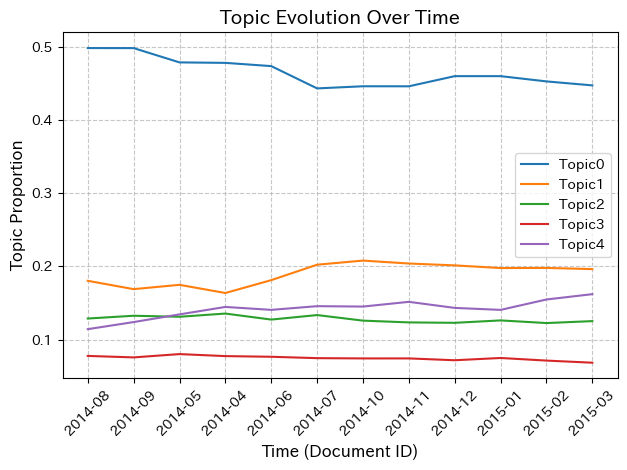

In [ ]:
num_topic = 5
# データの準備
data = time_topic_prob

# データを時間とトピック別に整理
times = list(data.keys())
topic_prob_data = [[data[t][s] for t in times] for s in range(num_topic)]
for i in range(num_topic):
    plt.plot(times_, topic_prob_data[i],label=f'Topic{i}')
# グラフのスタイリング
plt.xlabel('Time (Document ID)', fontsize=12)
plt.ylabel('Topic Proportion', fontsize=12)
plt.title('Topic Evolution Over Time', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

0 [('ﾂｹﾓﾉ                ﾌﾒｲ', 0.06045537434980597), ('ﾌﾒｲ ｶｼﾊﾟﾝ･ﾁﾖｳﾘﾊﾟﾝ     ﾌﾒｲ', 0.05396234171781695), ('ﾂﾏﾐﾙｲ               ﾌﾒｲ', 0.026487915119890782), ('ｿﾉﾀ ｶｼﾊﾟﾝ･ﾁﾖｳﾘﾊﾟﾝ     ﾌﾒｲ', 0.018647925353346275), ('ｿﾉﾀ ﾚｲﾄｳｼﾖｸﾋﾝ･ｽｲｻﾝﾋﾝ  ﾌﾒｲ', 0.012225623756016669)]

1 [('ﾔﾏｻﾞｷ ﾎｳｼﾞﾕﾝ 6ﾏｲ', 0.01731317864891303), ('ﾔﾏｻﾞｷ ﾌﾝﾜﾘｼﾖｸﾊﾟﾝ 6ﾏｲ', 0.01629566977312406), ('ﾂｹﾓﾉ                ﾌﾒｲ', 0.012634379329042971), ('ﾔﾏｻﾞｷ ﾎｳｼﾞﾕﾝ 8ﾏｲ', 0.010139654620876395), ('ﾔﾏｻﾞｷ ﾌﾝﾜﾘｼﾖｸﾊﾟﾝ(8)', 0.007871394809506655)]

2 [('ｿﾉﾀ ﾄｳﾌ(ﾓﾒﾝ)          ﾌﾒｲ', 0.0634195052068427), ('ｿﾉﾀ ﾄｳﾌ(ｷﾇ)           ﾌﾒｲ', 0.046431218336921806), ('ﾂｹﾓﾉ                ﾌﾒｲ', 0.02618763649309471), ('ｿﾉﾀ ﾚｲﾄｳｼﾖｸﾋﾝ･ﾁﾖｳﾘﾋﾝ  ﾌﾒｲ', 0.02347240012969625), ('ｿﾉﾀ ｱﾌﾞﾗｱｹﾞ           ﾌﾒｲ', 0.014450112359799231)]

3 [('ﾌｼﾞﾊﾟ ﾎﾝｼﾞｺﾐｼﾖｸﾊﾟﾝ    6ﾏｲ', 0.030378659466324166), ('ﾔﾏｻﾞｷ ｵｲｼｻﾀﾞﾖﾘ 6ﾏｲ', 0.01884109790383519), ('ﾘﾖ-ﾕ- ｶｼﾊﾟﾝ･ﾁﾖｳﾘﾊﾟﾝ   ﾌﾒｲ', 0.018720313372965123), ('ﾂﾏﾐﾙｲ               ﾌﾒｲ', 0.011955154553617045), ('ｿﾉﾀ ｺﾒ                ﾌﾒｲ', 0.010501717164208349)]

4 [('ﾔﾏｻﾞｷ ﾏﾙｺﾞﾄｿ-ｾ-ｼﾞ 1ｺ', 0.01556052294085652), ('ﾔﾏｻﾞｷｺﾂﾍﾟﾊﾟﾝﾏ-ｶﾞﾘﾝ&ｼﾞﾔﾑ1ｺ', 0.012296666974206213), ('ﾔﾏｻﾞｷ ﾎﾂｶｲﾄﾞｳﾁ-ｽﾞﾑｼｹ-ｷ 1ｺ', 0.011404809539074313), ('ﾔﾏｻﾞｷ ﾗﾝﾁﾊﾟﾂｸﾋﾟ-ﾅﾂ 2ｺ', 0.011170840667807219), ('ﾔﾏｻﾞｷ ｺﾂﾍﾟﾂﾌﾞｱﾝ&ﾏ-ｶﾞﾘﾝ 1ｺ', 0.010518677255398012)]


In [ ]:
data

In [ ]:
doc = ldaseq.doc_topics(2602727) # check the 558th document in the corpuses topic distribution
print (doc)


In [ ]:
#特定のドキュメントがどのクラスタに属するかを判別したもの
for token_idx in range(len(corpus)):
    doc = ldaseq.doc_topics(token_idx) # check the 558th document in the corpuses topic distribution
    print (doc)


[0.00952381 0.00952381 0.00952381 0.96190476 0.00952381]
[0.00952381 0.00952381 0.96190476 0.00952381 0.00952381]
[0.00952381 0.00952381 0.96190476 0.00952381 0.00952381]
[0.00952381 0.00952381 0.96190476 0.00952381 0.00952381]
[0.00952381 0.00952381 0.96190476 0.00952381 0.00952381]
[0.00952381 0.00952381 0.00952381 0.96190476 0.00952381]
[0.00952381 0.96190476 0.00952381 0.00952381 0.00952381]
[0.00952381 0.96190476 0.00952381 0.00952381 0.00952381]
[0.00952381 0.00952381 0.96190476 0.00952381 0.00952381]
[0.00952381 0.00952381 0.96190476 0.00952381 0.00952381]
[0.00952381 0.00952381 0.96190476 0.00952381 0.00952381]
[0.00952381 0.00952381 0.96190476 0.00952381 0.00952381]
[0.00952381 0.00952381 0.96190476 0.00952381 0.00952381]
[0.00952381 0.00952381 0.96190476 0.00952381 0.00952381]
[0.00952381 0.00952381 0.00952381 0.00952381 0.96190476]
[0.00952381 0.00952381 0.96190476 0.00952381 0.00952381]
[0.00952381 0.00952381 0.96190476 0.00952381 0.00952381]
[0.00952381 0.00952381 0.009523

KeyboardInterrupt: 

In [ ]:
# # 各トピックの時間ごとの重みを格納する配列を初期化
# num_topics = 10
# num_time_slices = 12
# topic_weights = np.zeros((num_topics, num_time_slices))
# # 各時点でのトピックの重みを取得
# for time in range(num_time_slices):
#     topics_at_time_t = ldaseq.print_topics(time=time)
#     #print(topics_at_time_t)
#     for topic_id, topic in enumerate(topics_at_time_t):
#         # トピックの重み（例えば、トピックの確率）を抽出して配列に格納
#         topic_weights[topic_id, time] = sum(prob for word, prob in topic)
#         topic_cont = [token for token, _ in topic]
#         print(f'{topic_id}:{topic_cont}')
#         #print(f'{topic_id}:{len(topic_cont)}')

In [ ]:
# topic_weights

In [ ]:
for time in range(num_time_slices):
    topics_at_time_t = ldaseq.print_topics(time=time)
    for topic_id, topic in enumerate(topics_at_time_t):
        # トピックの重み（例えば、トピックの確率）を抽出して配列に格納
        print(topic_id, topic)
        #topic_weights[topic_id, time] = sum(prob for word, prob in topic)
        #print(topic, id, sum(prob for word, prob in topic))

NameError: name 'num_time_slices' is not defined

## cat4 を対象に５つのクラスに分けて可視化

In [ ]:
#time_slice
cumulative_list = [sum(user_time_slice[:i+1]) for i in range(len(user_time_slice))]
print(cumulative_list)

[1741, 3483, 5225, 6967, 8709, 10451, 12193, 13935, 15677, 17419, 19161, 20903]


In [ ]:
# トピックの割合を計算
import numpy as np

time_topic_prob = {}
start = 0
for num, index in enumerate(cumulative_list):
    # 各トピックの確率を効率的に平均化
    topic_probs = np.mean(ldaseq.doc_topics(range(start,index)), axis = 0)

    # 結果を格納
    time_topic_prob[num] = topic_probs

    # 次の時間帯の開始点を更新
    start = index

In [ ]:
times_ = list(target_data['receipt_buydate'].dt.to_period("M").unique())
times_ = [str(str_time) for str_time in times_]

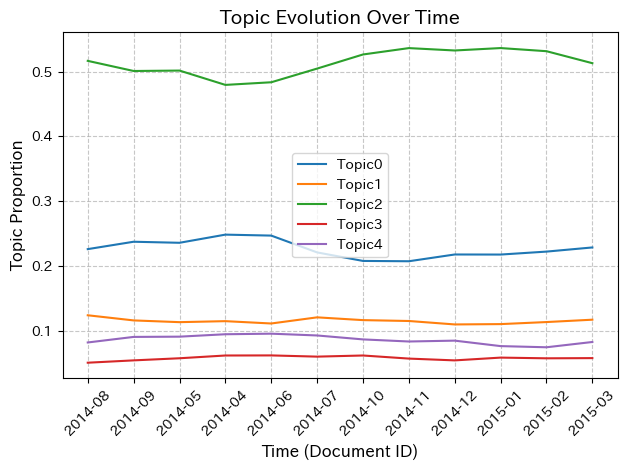

In [ ]:
num_topic = 5
# データの準備
data = time_topic_prob

# データを時間とトピック別に整理
times = list(data.keys())
topic_prob_data = [[data[t][s] for t in times] for s in range(num_topic)]
for i in range(num_topic):
    plt.plot(times_, topic_prob_data[i],label=f'Topic{i}')
# グラフのスタイリング
plt.xlabel('Time (Document ID)', fontsize=12)
plt.ylabel('Topic Proportion', fontsize=12)
plt.title('Topic Evolution Over Time', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#時系列でのトピックの確率を取得
for time in range(len(user_time_slice)):
    topics_at_time_t = ldaseq.print_topics(time=time)
    for topic_id, topic_prob in enumerate(topics_at_time_t):
        print(topic_id, topic_prob[0:5])

0 [('スナック', 0.12509539783058726), ('チョコレ－ト', 0.0889873661528388), ('アイスクリ－ム', 0.0839651840291007), ('ﾋﾞｽｹﾂﾄ&ｸﾗﾂｶ-', 0.05348303657386988), ('キャンディ', 0.05181248407258968)]
1 [('菓子パン・調理パン', 0.5409606936369161), ('食パン', 0.055445999498506024), ('ヨ－グルト', 0.03760435282694363), ('牛乳', 0.03653128312875903), ('ｶｯﾌﾟｲﾝｽﾀﾝﾄ麺', 0.03487726317675639)]
2 [('冷凍調理', 0.07544687001752573), ('豆腐類', 0.06835616645042689), ('牛乳', 0.05709605184919942), ('食パン', 0.05382183282206582), ('ヨ－グルト', 0.05297166983692319)]
3 [('コ－ヒ－ドリンク', 0.40009477866764576), ('たばこ', 0.23464565153108624), ('液体茶', 0.05652037022655731), ('ｶｯﾌﾟｲﾝｽﾀﾝﾄ麺', 0.03787582486470245), ('コ－ラ', 0.031803864060042424)]
4 [('ビ－ル', 0.15989270924198085), ('液体茶', 0.15241969053316487), ('その他酒類', 0.12224967818940721), ('ミネラルウォ－タ類', 0.07329995314158214), ('つまみ類', 0.04880241397836883)]
0 [('スナック', 0.11733174349883649), ('アイスクリ－ム', 0.10487637339303098), ('チョコレ－ト', 0.06949608936727075), ('ﾋﾞｽｹﾂﾄ&ｸﾗﾂｶ-', 0.04862805428830882), ('キャンディ', 0.04762476291084221)]
1 [('菓

## cat4を１０に分けて可視化

[1741, 3483, 5225, 6967, 8709, 10451, 12193, 13935, 15677, 17419, 19161, 20903]


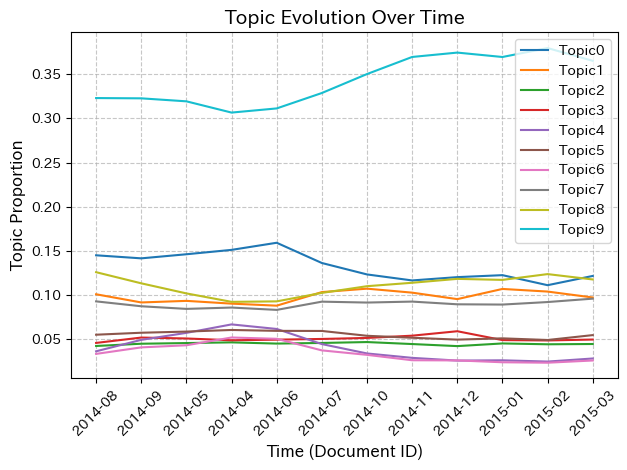

In [ ]:
#time_slice
cumulative_list = [sum(user_time_slice[:i+1]) for i in range(len(user_time_slice))]
print(cumulative_list)

# トピックの割合を計算
import numpy as np

time_topic_prob = {}
start = 0
for num, index in enumerate(cumulative_list):
    # 各トピックの確率を効率的に平均化
    topic_probs = np.mean(ldaseq.doc_topics(range(start,index)), axis = 0)

    # 結果を格納
    time_topic_prob[num] = topic_probs

    # 次の時間帯の開始点を更新
    start = index
times_ = list(target_data['receipt_buydate'].dt.to_period("M").unique())
times_ = [str(str_time) for str_time in times_]

num_topic = 10
# データの準備
data = time_topic_prob

# データを時間とトピック別に整理
times = list(data.keys())
topic_prob_data = [[data[t][s] for t in times] for s in range(num_topic)]
for i in range(num_topic):
    plt.plot(times_, topic_prob_data[i],label=f'Topic{i}')
# グラフのスタイリング
plt.xlabel('Time (Document ID)', fontsize=12)
plt.ylabel('Topic Proportion', fontsize=12)
plt.title('Topic Evolution Over Time', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#時系列でのトピックの確率を取得
for time in range(len(user_time_slice)):
    topics_at_time_t = ldaseq.print_topics(time=time)
    for topic_id, topic_prob in enumerate(topics_at_time_t):
        print(topic_id, topic_prob[0:10])

0 [('食パン', 0.11498699417554985), ('牛乳', 0.09897924592605035), ('１００％ジュ－ス', 0.048707406436968366), ('生麺・ゆで麺', 0.04282322232861026), ('ｶｯﾌﾟｲﾝｽﾀﾝﾄ麺', 0.04281596617237062), ('デザ－ト類', 0.03161299686333772), ('カレ－', 0.02455111545239352), ('乳酸菌飲料', 0.022161024561989498), ('果汁飲料', 0.021975293411556622), ('ヨ－グルト', 0.01969606334801889)]
1 [('冷凍調理', 0.4144935913714294), ('冷凍農産', 0.037976203625252634), ('洋風食品', 0.03497266104344608), ('畜肉ソ－セ－ジ', 0.03334817524669065), ('ｶｯﾌﾟｲﾝｽﾀﾝﾄ麺', 0.02382268114919861), ('冷凍水産', 0.022956545882660426), ('ﾒﾆｭ-専用料理の素', 0.019896714865416547), ('牛乳', 0.01828117792952776), ('豆腐類', 0.018188264149506996), ('ふりかけ', 0.01817876305319683)]
2 [('コ－ヒ－ドリンク', 0.4691536748886547), ('たばこ', 0.28473423954853827), ('ｶｯﾌﾟｲﾝｽﾀﾝﾄ麺', 0.04627669360984452), ('液体茶', 0.04062873442828476), ('紅茶ドリンク', 0.02743422625182353), ('コ－ラ', 0.020246839209083625), ('牛乳', 0.014220407939507893), ('チュ－インガム', 0.013984712089058526), ('果汁飲料', 0.008905133045855154), ('栄養ドリンク', 0.008455601946651622)]
3 [('ビ－ル', 0.

## cat4を７つのクラスタに分けて可視化

[1741, 3483, 5225, 6967, 8709, 10451, 12193, 13935, 15677, 17419, 19161, 20903]


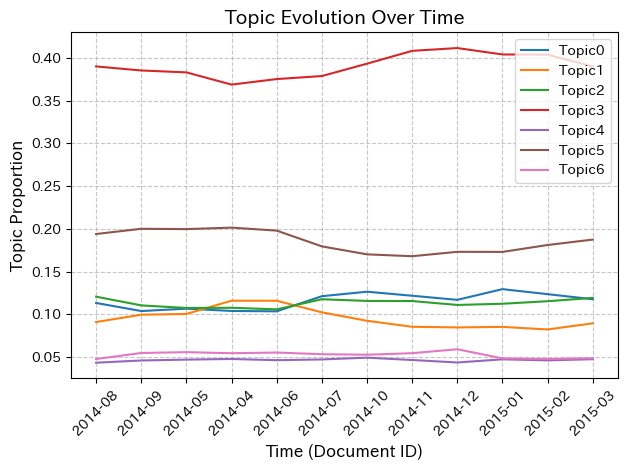

In [138]:
#time_slice
cumulative_list = [sum(user_time_slice[:i+1]) for i in range(len(user_time_slice))]
print(cumulative_list)

# トピックの割合を計算
import numpy as np

time_topic_prob = {}
start = 0
for num, index in enumerate(cumulative_list):
    # 各トピックの確率を効率的に平均化
    topic_probs = np.mean(ldaseq.doc_topics(range(start,index)), axis = 0)

    # 結果を格納
    time_topic_prob[num] = topic_probs

    # 次の時間帯の開始点を更新
    start = index
times_ = list(target_data['receipt_buydate'].dt.to_period("M").unique())
times_ = [str(str_time) for str_time in times_]

num_topic = 7
# データの準備
data = time_topic_prob

# データを時間とトピック別に整理
times = list(data.keys())
topic_prob_data = [[data[t][s] for t in times] for s in range(num_topic)]
for i in range(num_topic):
    plt.plot(times_, topic_prob_data[i],label=f'Topic{i}')
# グラフのスタイリング
plt.xlabel('Time (Document ID)', fontsize=12)
plt.ylabel('Topic Proportion', fontsize=12)
plt.title('Topic Evolution Over Time', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

0 [('冷凍調理', 0.3726352122945633), ('冷凍農産', 0.033808795015388395), ('畜肉ソ－セ－ジ', 0.03281714914640866), ('洋風食品', 0.032476959057840246), ('ｶｯﾌﾟｲﾝｽﾀﾝﾄ麺', 0.03081898295598855), ('牛乳', 0.02615684472554285), ('食パン', 0.022452474970349526), ('ﾒﾆｭ-専用料理の素', 0.020478988241762353), ('冷凍水産', 0.02039709075384167), ('ふりかけ', 0.018348100165492702)]

1 [('液体茶', 0.17842494655687807), ('炭酸飲料', 0.06740137247136074), ('ミネラルウォ－タ類', 0.05778099999959866), ('果汁飲料', 0.051168132792545444), ('ヨ－グルト', 0.04642164804714449), ('野菜ジユ－ス', 0.042633611334637826), ('スポ－ツドリンク', 0.03957405032799595), ('コ－ラ', 0.03910765358711928), ('紅茶ドリンク', 0.037527678699661), ('ｶｯﾌﾟｲﾝｽﾀﾝﾄ麺', 0.036172090474416406)
]
2 [('菓子パン・調理パン', 0.5585575429575586), ('食パン', 0.0652826211486016), ('牛乳', 0.04168485837718194), ('ヨ－グルト', 0.03413220153691874), ('ｶｯﾌﾟｲﾝｽﾀﾝﾄ麺', 0.02961443274885852), ('デザ－ト類', 0.016141302475028478), ('豆腐類', 0.014614659557755795), ('煎餅・あられ', 0.013197518998182013), ('ﾋﾞｽｹﾂﾄ&ｸﾗﾂｶ-', 0.01231541208568065), ('コ－ヒ－ドリンク', 0.012288168533604326
)]
3 [('豆腐類', 0.08315149492597922), ('ヨ－グルト', 0.06591131336498245), ('牛乳', 0.06540269073059572), ('食パン', 0.05882915868940508), ('納豆', 0.04733307545968458), ('生麺・ゆで麺', 0.03810978156440243), ('漬物', 0.028336875318812665), ('チ－ズ', 0.025389780616284083), ('畜肉ソ－セ－ジ', 0.023110440615673262), ('煎餅・あられ', 0.01896655057641737
8)]
4 [('コ－ヒ－ドリンク', 0.4577353704932603), ('たばこ', 0.27703870410024295), ('ｶｯﾌﾟｲﾝｽﾀﾝﾄ麺', 0.041723897275026296), ('液体茶', 0.039438528094156065), ('コ－ラ', 0.02455124709903373), ('紅茶ドリンク', 0.018275455353008802), ('牛乳', 0.016070974787329332), ('チュ－インガム', 0.013208808147510192), ('ミネラルウォ－タ類', 0.012008259674135002), ('栄養ドリンク', 0.0114564386661559
56)]
5 [('スナック', 0.1418288912575444), ('チョコレ－ト', 0.10495139409033626), ('アイスクリ－ム', 0.09534378234411157), ('ﾋﾞｽｹﾂﾄ&ｸﾗﾂｶ-', 0.0664547387735125), ('キャンディ', 0.05728984892827142), ('煎餅・あられ', 0.04919908885291175), ('ｶｯﾌﾟｲﾝｽﾀﾝﾄ麺', 0.03294708494441799), ('デザ－ト類', 0.032885286819367525), ('牛乳', 0.030049858928535806), ('食パン', 0.026119747532051
145)]
6 [('ビ－ル', 0.2757888094945109), ('その他酒類', 0.21191395029948273), ('つまみ類', 0.06440947511346236), ('ｶｯﾌﾟｲﾝｽﾀﾝﾄ麺', 0.04885150430097789), ('焼酎', 0.04844445216116547), ('ワイン', 0.04401994271991365), ('スナック', 0.03351028236343159), ('煎餅・あられ', 0.021862878453988373), ('日本酒', 0.01907048847104215), ('炭酸飲料', 0.01734420395745941)]


In [140]:
#時系列でのトピックの確率を取得
for time in range(len(user_time_slice)):
    topics_at_time_t = ldaseq.print_topics(time=time)
    for topic_id, topic_prob in enumerate(topics_at_time_t):
        print(topic_id, topic_prob[0:10])

0 [('冷凍調理', 0.3726352122945633), ('冷凍農産', 0.033808795015388395), ('畜肉ソ－セ－ジ', 0.03281714914640866), ('洋風食品', 0.032476959057840246), ('ｶｯﾌﾟｲﾝｽﾀﾝﾄ麺', 0.03081898295598855), ('牛乳', 0.02615684472554285), ('食パン', 0.022452474970349526), ('ﾒﾆｭ-専用料理の素', 0.020478988241762353), ('冷凍水産', 0.02039709075384167), ('ふりかけ', 0.018348100165492702)]
1 [('液体茶', 0.17842494655687807), ('炭酸飲料', 0.06740137247136074), ('ミネラルウォ－タ類', 0.05778099999959866), ('果汁飲料', 0.051168132792545444), ('ヨ－グルト', 0.04642164804714449), ('野菜ジユ－ス', 0.042633611334637826), ('スポ－ツドリンク', 0.03957405032799595), ('コ－ラ', 0.03910765358711928), ('紅茶ドリンク', 0.037527678699661), ('ｶｯﾌﾟｲﾝｽﾀﾝﾄ麺', 0.036172090474416406)]
2 [('菓子パン・調理パン', 0.5585575429575586), ('食パン', 0.0652826211486016), ('牛乳', 0.04168485837718194), ('ヨ－グルト', 0.03413220153691874), ('ｶｯﾌﾟｲﾝｽﾀﾝﾄ麺', 0.02961443274885852), ('デザ－ト類', 0.016141302475028478), ('豆腐類', 0.014614659557755795), ('煎餅・あられ', 0.013197518998182013), ('ﾋﾞｽｹﾂﾄ&ｸﾗﾂｶ-', 0.01231541208568065), ('コ－ヒ－ドリンク', 0.012288168533604326)

## サンキーダイアグラム

In [168]:
# トピックの割合を計算
import numpy as np

time_topic_prob = {}
start = 0
for num, index in enumerate(cumulative_list):
    # 各トピックの確率を効率的に平均化
    topic_probs = np.mean(ldaseq.doc_topics(range(start,index)), axis = 0)

    # 結果を格納
    time_topic_prob[num] = topic_probs

    # 次の時間帯の開始点を更新
    start = index

### コーパスindexとidの対応表

年月別に各ユーザーがどのしょうひんを買ったがわかり、コーパスのインデックスとidの対応をすることができた

このデータフレームに各時点所属クラスタをデータフレームに格納する。

->時系列でのユーザークラスタの遷移を確認することができる

In [211]:
# グループ化してリストにする
grouped_cat4_data = target_data_food.groupby([target_data_food['receipt_buydate'].dt.to_period("M"), 'id'])['cat4'].apply(lambda x: [product.strip() for product in x]).reset_index()

# ループの回数（インデックス）をカウントし、ユーザーIDの情報を追加
grouped_cat4_data['loop_count'] = grouped_cat4_data.index
grouped_cat4_data['user_id'] = grouped_cat4_data['id']

# 結果の表示
grouped_cat4_data.head()


,receipt_buydate,id,cat4,loop_count,user_id
0,2014-04,16.0,"[ちくわ, マヨネ－ズ, 牛乳, 牛乳, ﾒﾆｭ-専用料理の素, 中華風食品, 菓子パン・調...",0,16.0
1,2014-04,23.0,"[日本酒, 豆腐類, 香辛料, チョコレ－ト, スナック, 生麺・ゆで麺, 食パン, 食パン...",1,23.0
2,2014-04,40.0,"[ﾋﾞｽｹﾂﾄ&ｸﾗﾂｶ-, 風味調味料, ビ－ル, 畜肉ソ－セ－ジ, 畜肉ソ－セ－ジ, サ...",2,40.0
3,2014-04,57.0,"[キャンディ, 食パン, 栄養ドリンク, スナック, その他飲料, スナック, ﾋﾞｽｹﾂﾄ...",3,57.0
4,2014-04,70.0,"[ビ－ル, ビ－ル, ビ－ル, デザ－ト類, ビ－ル, つまみ類, ビ－ル, ビ－ル, ビ－...",4,70.0


In [247]:
grouped_cat4_data["user_id"]

0           16.0
1           23.0
2           40.0
3           57.0
4           70.0
          ...   
20898    40258.0
20899    40277.0
20900    40310.0
20901    40343.0
20902    40344.0
Name: user_id, Length: 20903, dtype: float64

In [267]:
user_seg_dic = {}
for index, user_id in enumerate(grouped_cat4_data["user_id"]):
    user_prob_list = ldaseq.doc_topics(index)
    max_index = np.argmax(user_prob_list)
    if user_id not in user_seg_dic:
        user_seg_dic[user_id] = []
    user_seg_dic[user_id].append(max_index)

In [273]:
user_seg_dic

{16.0: [3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3],
 23.0: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 40.0: [3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3],
 57.0: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 70.0: [6, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3],
 73.0: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 87.0: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 102.0: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 106.0: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 139.0: [5, 5, 5, 5, 5, 5, 5, 6, 3, 5, 5, 5],
 169.0: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 180.0: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 198.0: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 207.0: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 233.0: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 235.0: [3, 5, 5, 0, 5, 3, 5, 3, 3, 3, 0, 3],
 257.0: [3, 3, 3, 3, 0, 3, 5, 3, 3, 0, 3, 3],
 259.0: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 272.0: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 273.0: [5, 5, 1, 1, 3, 5, 1, 1, 1, 3, 5, 5],
 312.0: [0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 5, 3],
 358.0: [6, 6, 6, 6, 6, 6, 6, 4, 4, 6, 6,

ValueError: x and y must have same first dimension, but have shapes (12,) and (11,)

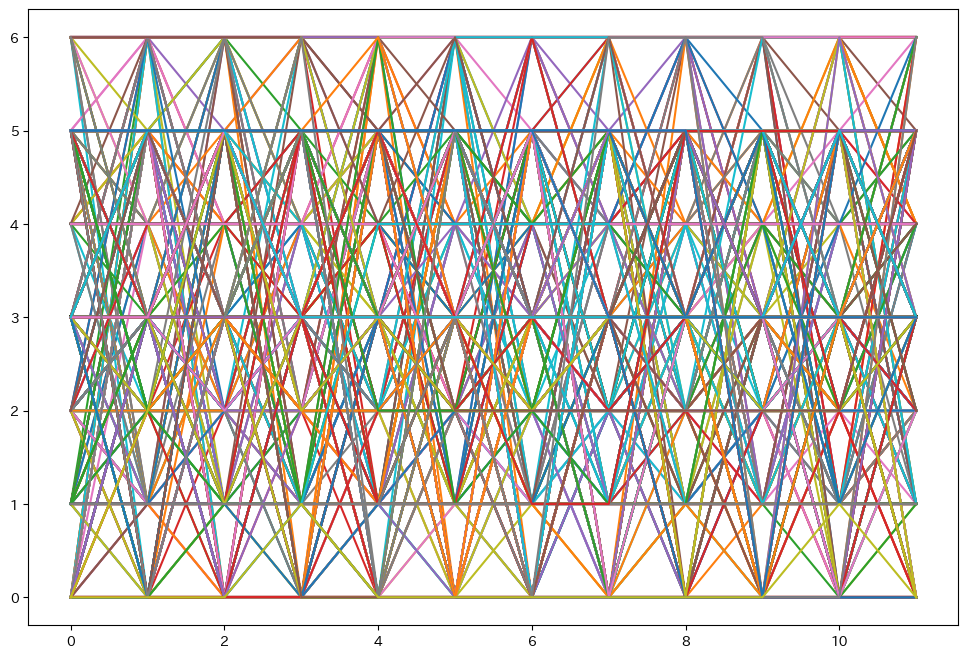

In [263]:
import matplotlib.pyplot as plt

# 時系列の長さ（ここでは12を仮定）
time_series_length = len(next(iter(user_seg_dic.values())))

# 各ユーザーの時系列クラスタをプロット
plt.figure(figsize=(12, 8))

for user_id, clusters in user_seg_dic.items():
    plt.plot(range(time_series_length), clusters, label=f'User {user_id}')

# グラフの設定
plt.xlabel('Time')
plt.ylabel('Cluster')
plt.title('User Cluster Time Series')
plt.legend()
plt.grid(True)
plt.show()


In [268]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ユーザーIDをリストに変換
user_ids = list(user_seg_dic.keys())

# ユーザーごとのクラスタデータを行列に変換
cluster_data = np.array(list(user_seg_dic.values()))

# ヒートマップのプロット
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_data, annot=True, fmt="d", cmap="viridis", xticklabels=range(1, len(cluster_data[0]) + 1), yticklabels=user_ids)

# グラフの設定
plt.xlabel('Time')
plt.ylabel('User ID')
plt.title('User Cluster Time Series Heatmap')
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1742,) + inhomogeneous part.

In [176]:
user_prob_list = ldaseq.doc_topics(1).max()
max_value = user_prob_list.max()

In [178]:
max_value

0.6977303933170654

In [186]:
user_prob_list

0.6977303933170654

In [188]:
user_prob_list = ldaseq.doc_topics(1)
max_index = np.argmax(user_prob_list)
max_index

3

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# サンプルデータの作成（複数の遷移を含むデータ）
data = {
    'source': ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9',
               'Cluster 1', 'Cluster 2', 'Cluster 0', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 0',
               'Cluster 2', 'Cluster 0', 'Cluster 1', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 0', 'Cluster 1'],
    'target': ['Cluster 1', 'Cluster 2', 'Cluster 0', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 0',
               'Cluster 2', 'Cluster 0', 'Cluster 1', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 0', 'Cluster 1',
               'Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 0', 'Cluster 1', 'Cluster 2'],
    'value': [10, 20, 15, 5, 8, 12, 18, 25, 7, 14, 11, 21, 16, 6, 9, 13, 19, 26, 8, 15, 12, 22, 17, 7, 10, 14, 20, 27, 9, 16],
    'time': ['2017-04', '2017-04', '2017-04', '2017-04', '2017-04', '2017-04', '2017-04', '2017-04', '2017-04', '2017-04',
             '2017-05', '2017-05', '2017-05', '2017-05', '2017-05', '2017-05', '2017-05', '2017-05', '2017-05', '2017-05',
             '2017-06', '2017-06', '2017-06', '2017-06', '2017-06', '2017-06', '2017-06', '2017-06', '2017-06', '2017-06']
}

df = pd.DataFrame(data)

# クラスター名のリストを作成
clusters = sorted(list(set(df['source']).union(set(df['target']))))

# クラスター名をインデックスに変換するためのマッピングを作成
cluster_mapping = {cluster: i for i, cluster in enumerate(clusters)}

# ソースとターゲットのインデックスをデータフレームに追加
df['source_idx'] = df['source']
df['target_idx'] = df['target']

# 時間ごとのサンキーダイアグラムを作成するためのデータ構造
sankey_data = []
time_periods = sorted(list(set(df['time'])))

# 各時点のノードとリンクを準備
all_nodes = []
all_links = []
for i in range(len(time_periods) - 1):
    time_start = time_periods[i]
    time_end = time_periods[i + 1]
    time_df = df[(df['time'] == time_start)]
    for node in clusters:
        all_nodes.append((node, time_start))
        all_nodes.append((node, time_end))
    for _, row in time_df.iterrows():
        all_links.append((row['source'], row['target'], row['value'], time_start, time_end))

# 重複ノードの除去
unique_nodes = list({(node, time) for node, time in all_nodes})
node_indices = {node: i for i, node in enumerate(unique_nodes)}
unique_labels = [f"{time}: {node}" for node, time in unique_nodes]

# ノードの位置を調整（各時間点で均等に配置）
x_coords = []
y_coords = []
node_pos = {time: [] for time in time_periods}
for node, time in unique_nodes:
    x_coords.append(time_periods.index(time) / (len(time_periods) - 1))
    y_coords.append((cluster_mapping[node] + len(node_pos[time])) / (len(clusters) + len(node_pos[time])))
    node_pos[time].append(cluster_mapping[node])

# リンクの作成
link_sources = [node_indices[(source, start_time)] for source, target, value, start_time, end_time in all_links]
link_targets = [node_indices[(target, end_time)] for source, target, value, start_time, end_time in all_links]
link_values = [value for source, target, value, start_time, end_time in all_links]

# サンキーダイアグラムの作成
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=unique_labels,
        x=x_coords,
        y=y_coords
    ),
    link=dict(
        source=link_sources,
        target=link_targets,
        value=link_values
    )
)])

# レイアウトの設定
fig.update_layout(
    title_text="Cluster Transitions from April to July",
    font_size=10
)

fig.show()



In [ ]:
import pandas as pd
import plotly.graph_objects as go

# サンプルデータの作成（複数の遷移を含むデータ）
data = {
    'source': ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9',
               'Cluster 1', 'Cluster 2', 'Cluster 0', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 0',
               'Cluster 2', 'Cluster 0', 'Cluster 1', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 0', 'Cluster 1'],
    'target': ['Cluster 1', 'Cluster 2', 'Cluster 0', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 0',
               'Cluster 2', 'Cluster 0', 'Cluster 1', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 0', 'Cluster 1',
               'Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 0', 'Cluster 1', 'Cluster 2'],
    'value': [10, 20, 15, 5, 8, 12, 18, 25, 7, 14, 11, 21, 16, 6, 9, 13, 19, 26, 8, 15, 12, 22, 17, 7, 10, 14, 20, 27, 9, 16],
    'time': ['2017-04', '2017-04', '2017-04', '2017-04', '2017-04', '2017-04', '2017-04', '2017-04', '2017-04', '2017-04',
             '2017-05', '2017-05', '2017-05', '2017-05', '2017-05', '2017-05', '2017-05', '2017-05', '2017-05', '2017-05',
             '2017-06', '2017-06', '2017-06', '2017-06', '2017-06', '2017-06', '2017-06', '2017-06', '2017-06', '2017-06']
}

df = pd.DataFrame(data)

# クラスター名のリストを作成
clusters = sorted(list(set(df['source']).union(set(df['target']))))

# クラスター名をインデックスに変換するためのマッピングを作成
cluster_mapping = {cluster: i for i, cluster in enumerate(clusters)}

# ソースとターゲットのインデックスをデータフレームに追加
df['source_idx'] = df['source']
df['target_idx'] = df['target']

# 時間ごとのサンキーダイアグラムを作成するためのデータ構造
sankey_data = []
time_periods = sorted(list(set(df['time'])))

# 各時点のノードとリンクを準備
all_nodes = []
all_links = []
for i in range(len(time_periods) - 1):
    time_start = time_periods[i]
    time_end = time_periods[i + 1]
    time_df = df[(df['time'] == time_start)]
    for node in clusters:
        all_nodes.append((node, time_start))
        all_nodes.append((node, time_end))
    for _, row in time_df.iterrows():
        all_links.append((row['source'], row['target'], row['value'], time_start, time_end))

# 重複ノードの除去
unique_nodes = list({(node, time) for node, time in all_nodes})
node_indices = {node: i for i, node in enumerate(unique_nodes)}
unique_labels = [f"{time}: {node}" for node, time in unique_nodes]

# ノードの位置を調整（各時間点で均等に配置）
x_coords = []
y_coords = []
node_pos = {time: [] for time in time_periods}
for node, time in unique_nodes:
    x_coords.append(time_periods.index(time) / (len(time_periods) - 1))
    y_coords.append((cluster_mapping[node] + len(node_pos[time])) / (len(clusters) + len(node_pos[time])))
    node_pos[time].append(cluster_mapping[node])

# リンクの作成
link_sources = [node_indices[(source, start_time)] for source, target, value, start_time, end_time in all_links]
link_targets = [node_indices[(target, end_time)] for source, target, value, start_time, end_time in all_links]
link_values = [value for source, target, value, start_time, end_time in all_links]

# サンキーダイアグラムの作成
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=unique_labels,
        x=x_coords,
        y=y_coords
    ),
    link=dict(
        source=link_sources,
        target=link_targets,
        value=link_values
    )
)])

# レイアウトの設定
fig.update_layout(
    title_text="Cluster Transitions from April to July",
    font_size=10
)

fig.show()
